<div align="center" style="width: 100%; background-color: #F7F7F7; margin-bottom: 3em;">
    <h1 style="font-family: courier; font-size: 4em; padding-top: .5em;"><b>Brazilian Flights</b></h1>
    <img src="../img/brazilian-flights.png">    
</div>

## Vôos no Brasil

O objetivo deste estudo é analisar as informações sobre os vôos nacionais e internacionais oriundos e de destino ao Brasil, disponibilizados pela `ANAC` por meio de seu portal: [Portal da Agência Nacional de Aviação Cívil][portal1].

Estou utilizando como base alguns estudos já realizados, em conjunto com algumas análises já publicadas. Toda a referência utilizada está no tópico de referências ao final do notebook.

Antes de começar a trabalhar com os arquivos, vamos importar as bibliotecas que serão utilizadas, bem como inicializar configurações de ambiente.

[portal1]: <https://www.anac.gov.br/assuntos/dados-e-estatisticas/dados-estatisticos/>

In [44]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pal = sns.dark_palette("palegreen", as_cmap=True)

%matplotlib inline
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)

No site da `ANAC` temos os dados separados por ano no formato **xlsb**. Se você quiser explorar esses dados, ou apenas usar um desses arquivos para testar as transformações, é só instalar o pacote **pyxlsb**.

```python
!pip install pyxlsb
```

Em nosso caso vamos utilizar os dados **full**, com as informações que se iniciam no ano de **2000**. Na célula abaixo realizo o download do arquivo no site oficial da ´ANAC´. Caso queria explorar os outros arquivos o link para acesso leva a área de [Dados Estatísticos (CSV)](https://www.anac.gov.br/assuntos/dados-e-estatisticas/dados-estatisticos/).

O download será realizado na pasta **data**.

In [ ]:
!curl https://www.anac.gov.br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/dados-estatisticos.csv -o data/dados-estatisticos.csv

In [46]:
flight_data = pd.read_csv("../data/dados-estatisticos.csv", delimiter=";", encoding="latin1", thousands=',')

In [47]:
flight_data.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,GRUPO DE VOO,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,RTK,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Regular,46100.0,700.0,157900.0,6200.0,0.0,41328000.0,27840000.0,4606848.0,2429040.0,1593600.0,288000.0,600.0,96480000.0,2976000.0,0.0,86100.0,9597600.0,653.0,397900.0
1,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,Doméstica,Improdutivo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115700.0,0.0,100.0,0.0,0.0,0.0,14400.0,1594700.0,40.0,0.0
2,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBSP,SÃO PAULO - CONGONHAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Improdutivo,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,255900.0,41300.0,100.0,0.0,0.0,0.0,14400.0,1594700.0,85.0,0.0
3,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBSP,SÃO PAULO - CONGONHAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Regular,792200.0,17000.0,1456700.0,35000.0,0.0,451615500.0,322718200.0,50090870.0,28087056.0,19413700.0,3138800.0,7600.0,583816800.0,14455000.0,0.0,1093500.0,121285400.0,7377.0,8100400.0
4,GLO,GOL,BRASILEIRA,2005,11,SBNT,NATAL,RN,NORDESTE,BRASIL,AMÉRICA DO SUL,SAEZ,BUENOS AIRES,NaN,NaN,ARGENTINA,AMÉRICA DO SUL,Internacional,Regular,2400.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39300.0


O arquivo **original** em **CSV** possui o seguinte cabeçalho:

    EMPRESA (SIGLA);EMPRESA (NOME);EMPRESA (NACIONALIDADE);ANO;MÊS;AEROPORTO DE ORIGEM (SIGLA);AEROPORTO DE ORIGEM (NOME);AEROPORTO DE ORIGEM (UF);AEROPORTO DE ORIGEM (REGIÃO);AEROPORTO DE ORIGEM (PAÍS);AEROPORTO DE ORIGEM (CONTINENTE);AEROPORTO DE DESTINO (SIGLA);AEROPORTO DE DESTINO (NOME);AEROPORTO DE DESTINO (UF);AEROPORTO DE DESTINO (REGIÃO);AEROPORTO DE DESTINO (PAÍS);AEROPORTO DE DESTINO (CONTINENTE);NATUREZA;GRUPO DE VOO;PASSAGEIROS PAGOS;PASSAGEIROS GRÁTIS;CARGA PAGA (KG);CARGA GRÁTIS (KG);CORREIO (KG);ASK;RPK;ATK;RTK;COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS;DISTÂNCIA VOADA (KM);DECOLAGENS;CARGA PAGA KM;CARGA GRATIS KM;CORREIO KM;ASSENTOS;PAYLOAD;HORAS VOADAS
    
Não é o mais fácil dos cabeçalhos para trabalhar. Neste caso vou optar por renomear as colunas. Neste caso vou utilizar a função `rename`, apenas informando um mapa especificando o nome antigo e o novo nome desejado. Também vou utilizar o parâmetro `inplace=True` para refletir a alteração. Em seguida exibo novamente o cabeçalho do dataframe, agora com as alterações.

In [48]:
flight_data.rename(
    columns={
        'EMPRESA (SIGLA)':'empresa_sigla', 
        'EMPRESA (NOME)':'empresa_nome', 
        'EMPRESA (NACIONALIDADE)':'empresa_nacionalidade', 
        'ANO':'ano',
        'MÊS':'mes', 
        'AEROPORTO DE ORIGEM (SIGLA)':'origem_sigla', 
        'AEROPORTO DE ORIGEM (NOME)':'origem_nome',
        'AEROPORTO DE ORIGEM (UF)':'origem_uf', 
        'AEROPORTO DE ORIGEM (REGIÃO)':'origem_regiao',
        'AEROPORTO DE ORIGEM (PAÍS)':'origem_pais',
        'AEROPORTO DE ORIGEM (CONTINENTE)':'origem_continente',
        'AEROPORTO DE DESTINO (SIGLA)':'destino_sigla', 
        'AEROPORTO DE DESTINO (NOME)':'destino_nome',
        'AEROPORTO DE DESTINO (UF)':'destino_uf', 
        'AEROPORTO DE DESTINO (REGIÃO)':'destino_regiao',
        'AEROPORTO DE DESTINO (PAÍS)':'destino_pais', 
        'AEROPORTO DE DESTINO (CONTINENTE)':'destino_continente',
        'NATUREZA':'natureza', 
        'GRUPO DE VOO':'grupo_voo',
        'PASSAGEIROS PAGOS':'passageiros_pagos',
        'PASSAGEIROS GRÁTIS':'passageiros_gratis',
        'CARGA PAGA (KG)':'carga_paga_kg',
        'CARGA GRÁTIS (KG)':'garta_gratis_kg',
        'CORREIO (KG)':'correio_kg',
        'ASK':'ask',
        'RPK':'rpk',
        'ATK':'atk',
        'RTK':'rtk',
        'COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS':'combustivel_lt',
        'DISTÂNCIA VOADA (KM)':'distancia_voada_km',
        'DECOLAGENS':'decolagens',
        'CARGA PAGA KM':'carga_paga_km',
        'CARGA GRATIS KM':'carga_gratis_km',
        'CORREIO KM':'correio_km',
        'ASSENTOS':'assentos', 
        'PAYLOAD':'payload',
        'HORAS VOADAS':'horas_voadas',
        'BAGAGEM (KG)':'bagagem_kg'
    }, inplace=True)

In [49]:
flight_data.head()

,empresa_sigla,empresa_nome,empresa_nacionalidade,ano,mes,origem_sigla,origem_nome,origem_uf,origem_regiao,origem_pais,origem_continente,destino_sigla,destino_nome,destino_uf,destino_regiao,destino_pais,destino_continente,natureza,grupo_voo,passageiros_pagos,passageiros_gratis,carga_paga_kg,garta_gratis_kg,correio_kg,ask,rpk,atk,rtk,combustivel_lt,distancia_voada_km,decolagens,carga_paga_km,carga_gratis_km,correio_km,assentos,payload,horas_voadas,bagagem_kg
0,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Regular,46100.0,700.0,157900.0,6200.0,0.0,41328000.0,27840000.0,4606848.0,2429040.0,1593600.0,288000.0,600.0,96480000.0,2976000.0,0.0,86100.0,9597600.0,653.0,397900.0
1,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,Doméstica,Improdutivo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115700.0,0.0,100.0,0.0,0.0,0.0,14400.0,1594700.0,40.0,0.0
2,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBSP,SÃO PAULO - CONGONHAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Improdutivo,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,255900.0,41300.0,100.0,0.0,0.0,0.0,14400.0,1594700.0,85.0,0.0
3,GLO,GOL,BRASILEIRA,2005,11,SBNF,NAVEGANTES,SC,SUL,BRASIL,AMÉRICA DO SUL,SBSP,SÃO PAULO - CONGONHAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,Doméstica,Regular,792200.0,17000.0,1456700.0,35000.0,0.0,451615500.0,322718200.0,50090870.0,28087056.0,19413700.0,3138800.0,7600.0,583816800.0,14455000.0,0.0,1093500.0,121285400.0,7377.0,8100400.0
4,GLO,GOL,BRASILEIRA,2005,11,SBNT,NATAL,RN,NORDESTE,BRASIL,AMÉRICA DO SUL,SAEZ,BUENOS AIRES,NaN,NaN,ARGENTINA,AMÉRICA DO SUL,Internacional,Regular,2400.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39300.0


In [50]:
flight_data.dtypes

empresa_sigla             object
empresa_nome              object
empresa_nacionalidade     object
ano                        int64
mes                        int64
origem_sigla              object
origem_nome               object
origem_uf                 object
origem_regiao             object
origem_pais               object
origem_continente         object
destino_sigla             object
destino_nome              object
destino_uf                object
destino_regiao            object
destino_pais              object
destino_continente        object
natureza                  object
grupo_voo                 object
passageiros_pagos        float64
passageiros_gratis       float64
carga_paga_kg            float64
garta_gratis_kg          float64
correio_kg               float64
ask                      float64
rpk                      float64
atk                      float64
rtk                      float64
combustivel_lt           float64
distancia_voada_km       float64
decolagens

Criaremos duas colunas temporárias, uma chamada PASSAGEIROS TOTAL, que engloba a soma dos Passageiros Pagos (Clientes) e dos Passageiros Grátis (tripulação, convidados?). Também criaremos uma coluna ASSENTOS VAGOS, contendo a diferença entre o número de assentos médio de cada trecho com o total de passageiros médio de cada trecho.

In [51]:
flight_data['passageiros_total'] = flight_data['passageiros_pagos'] + flight_data['passageiros_gratis']
flight_data['assentos_vagos'] = flight_data['assentos'] - flight_data['passageiros_total']

Primeiro vamos trabalhar com os vôos que chegam ao Brasil. Para isso, iremos criar uma váriavel **inbound_flights** contendo os registros onde o país de destino é o Brasil, onde existem passageiros e onde o país de origem não é o Brasil (ou seja, somente vôos que venham do exterior).

Nossa segunda etapa será agrupar os dados por trecho (Aeroporto de Origem - Aeroporto de Destino). Com isso podemos calcular e plotar o total de decolagens em cada trecho, e o número de passageiros transportados, bem como o número de assentos vagos nos vôos.

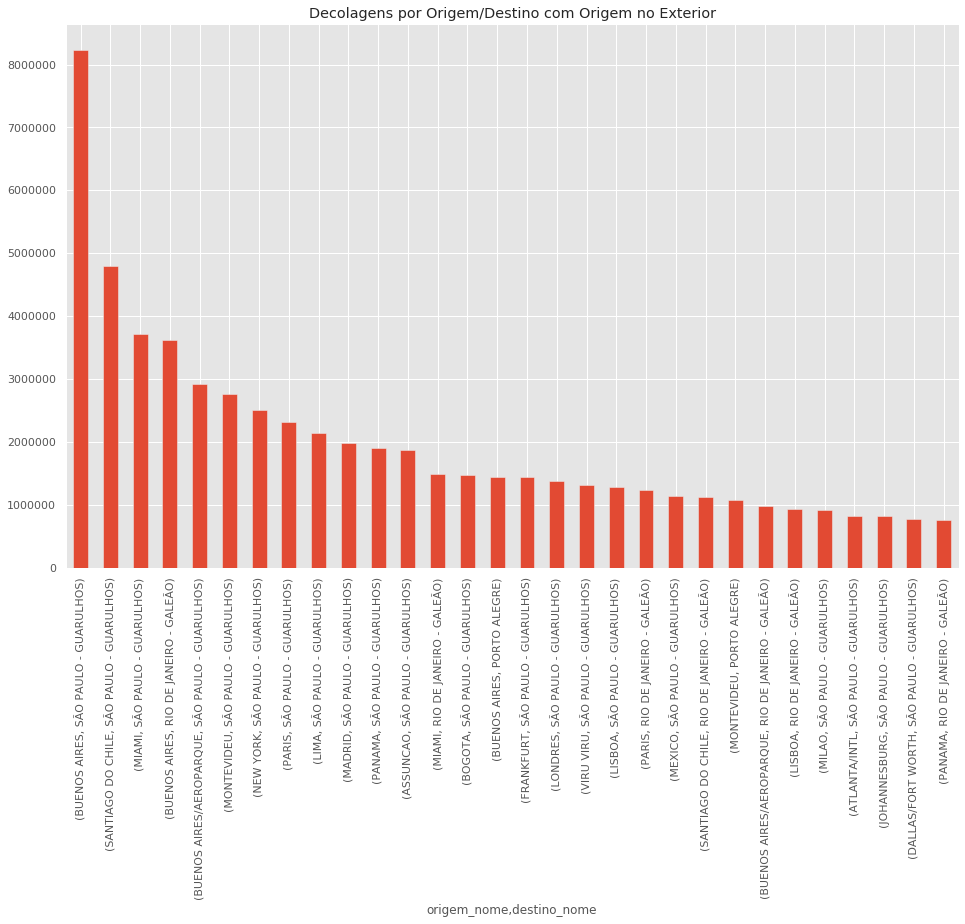

In [52]:
inbound_flights = flight_data[ (flight_data['destino_pais'] == "BRASIL") &
                               (flight_data['passageiros_total'] > 0) &
                               (flight_data['origem_pais'] != "BRASIL")]

inbound_flights_by_airport = inbound_flights.groupby(['origem_nome', 'destino_nome'])

top30 = inbound_flights_by_airport['decolagens'].sum().sort_values(ascending=False)[:30]

top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino com Origem no Exterior')

plt.show()

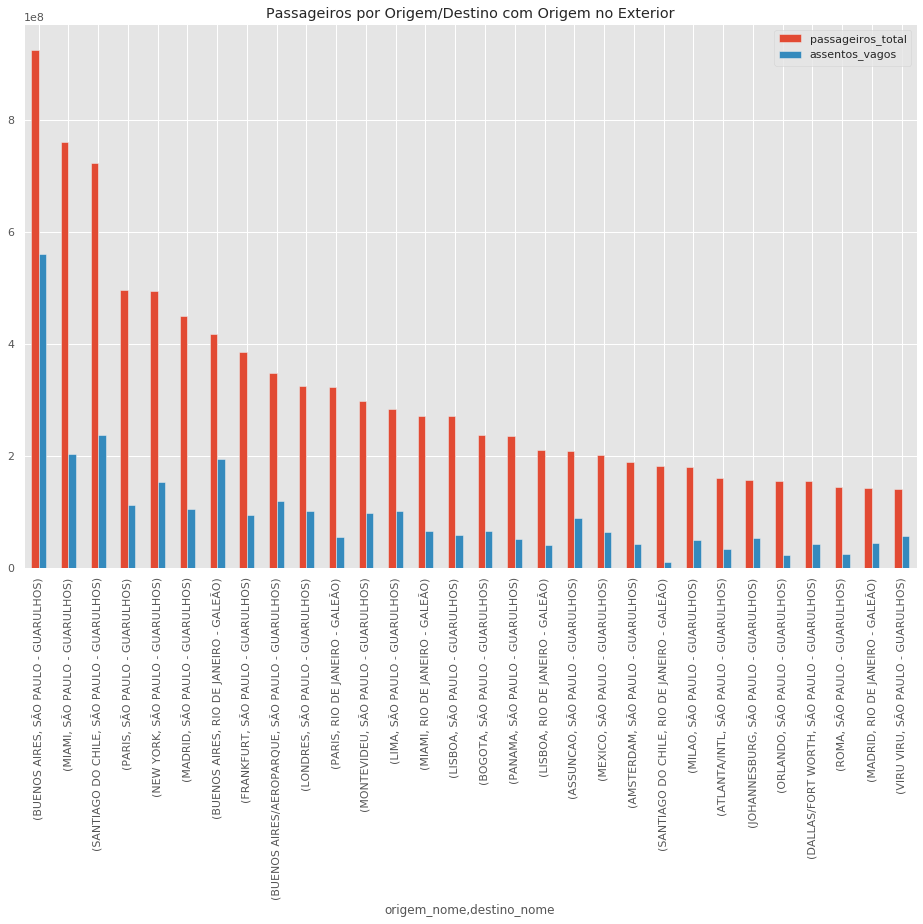

In [53]:
top30 = inbound_flights_by_airport['passageiros_total', 'assentos_vagos'].sum().sort_values('passageiros_total', ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino com Origem no Exterior')

plt.show()

Muitos países possuem vários aeroportos que enviam vôos para o Brasil. Nos gráficos acima é fácil perceber que Miami, Nova York, Orlando e Atlanta, por exemplo, enviam muitos passageiros para o Brasil. Vamos agora agrupar os vôos que chegao ao Brasil pelo País de Origem. Esses dados ficarão na variável *inbound_flights_by_country*.

Com ela será possível plotar um gráfico mostrando o total de decolagens provenientes de cada país, e na próxima série, o número de passageiros que vieram de cada um desses países.



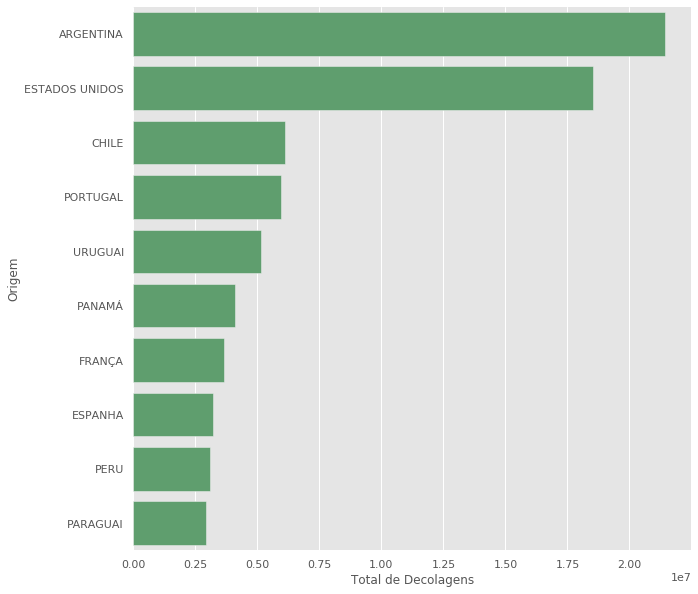

In [54]:
inbound_flights_by_country = inbound_flights.groupby('origem_pais')

top10 = inbound_flights_by_country['decolagens'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='origem_pais', x='decolagens', data=top10, label='decolagens', orient='h', color='g')
ax.set(ylabel="Origem", xlabel="Total de Decolagens")
sns.despine(left=True, bottom=True)

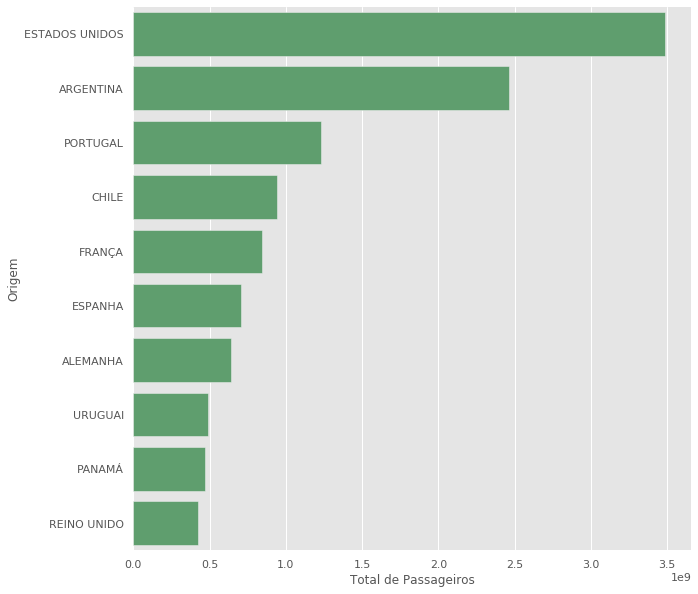

In [55]:
top10 = inbound_flights_by_country['passageiros_total'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='origem_pais', x='passageiros_total', data=top10, label='decolagens', orient='h', color='g')
ax.set(ylabel="Origem", xlabel="Total de Passageiros")
sns.despine(left=True, bottom=True)

Para calcular os vôos que saem ao Brasil, utilizaremos uma lógica similar a apresentada acima. Para isso, iremos criar uma váriavel **outbound_flights** contendo os registros onde o país de origem é o Brasil, onde existem passageiros e onde o país de destino não é o Brasil (ou seja, somente vôos que vão para o exterior).

Nossa segunda etapa será agrupar os dados por trecho (Aeroporto de Origem - Aeroporto de Destino). Com isso podemos calcular e plotar o total de decolagens em cada trecho, e o número de passageiros transportados, bem como o número de assentos vagos nos vôos.

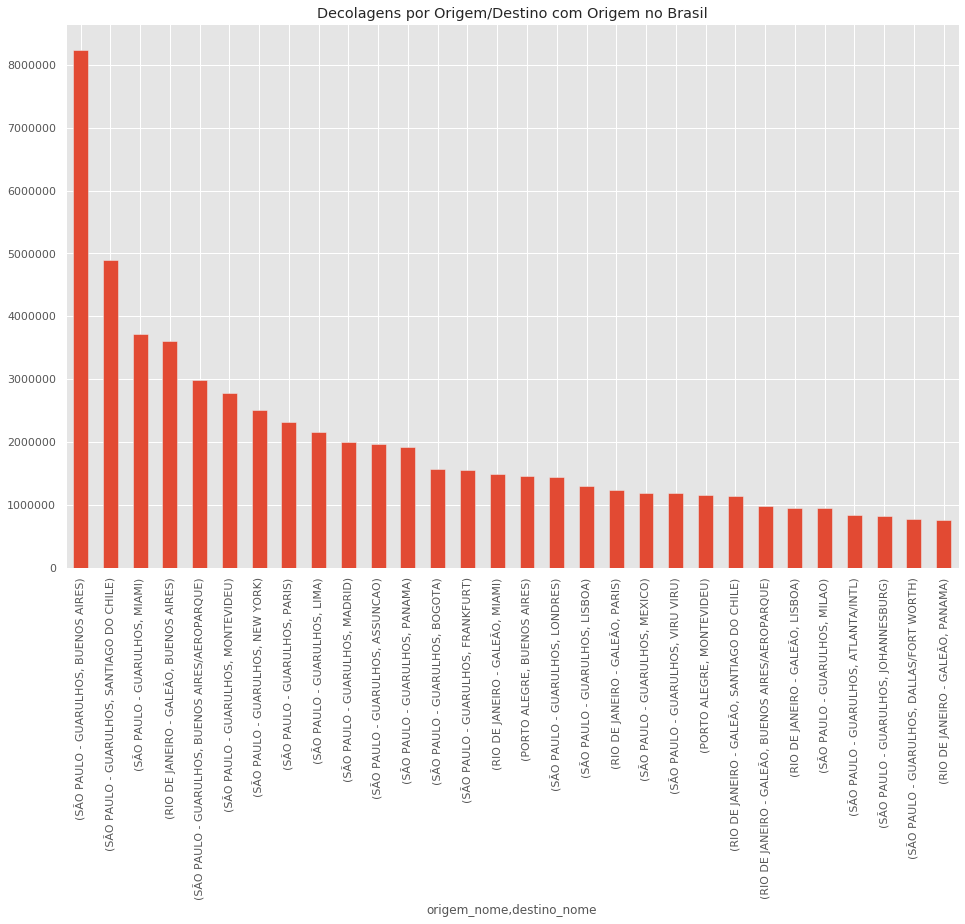

In [56]:
outbound_flights = flight_data[ (flight_data['origem_pais'] == "BRASIL") &
                                (flight_data['passageiros_total'] > 0) &
                                (flight_data['destino_pais'] != "BRASIL")]

outbound_flights_by_airport = outbound_flights.groupby(['origem_nome', 'destino_nome'])

top30 = outbound_flights_by_airport['decolagens'].sum().sort_values(ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino com Origem no Brasil')

plt.show()

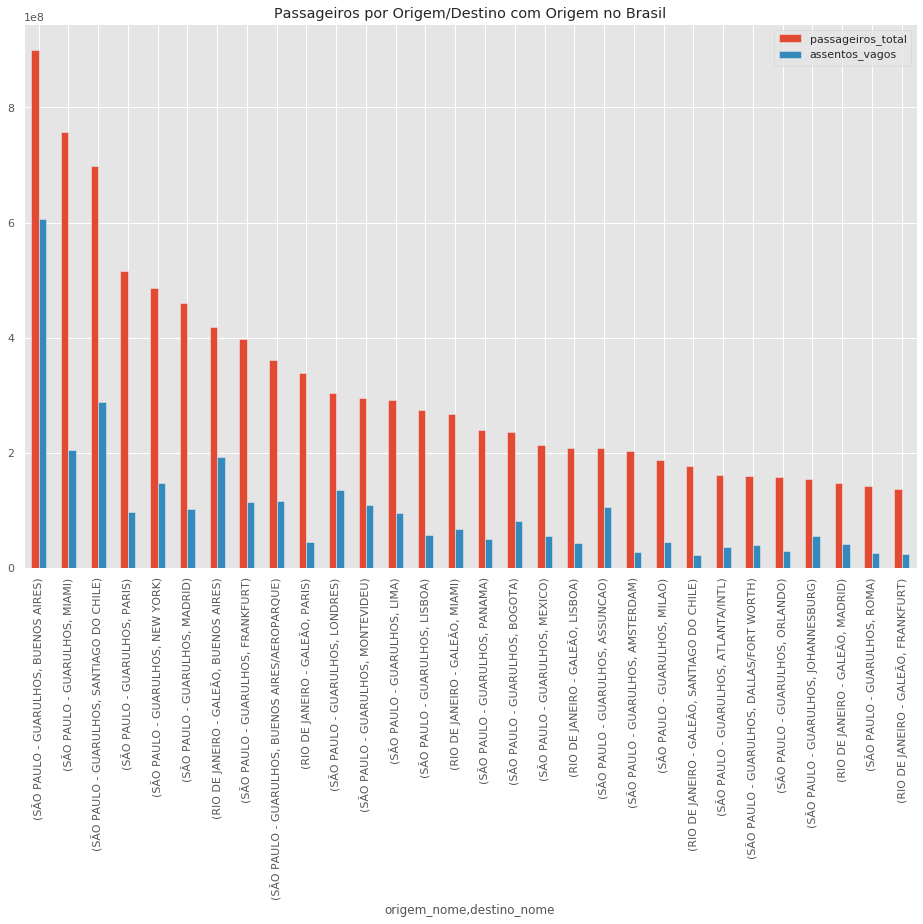

In [57]:
top30 = outbound_flights_by_airport['passageiros_total', 'assentos_vagos'].sum().sort_values('passageiros_total', ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino com Origem no Brasil')

plt.show()

Do mesmo modo que calculamos o número de decolagens vindas de cada país até o Brasil, e o número de passageiros, vamos aplicar a mesma lógica e criar a variável *outbound_flights_by_country*. Logo após plotaremos o gráfico de decolagens para o Exterior por país, e o número de passageiros que enviamos para cada um desses países.

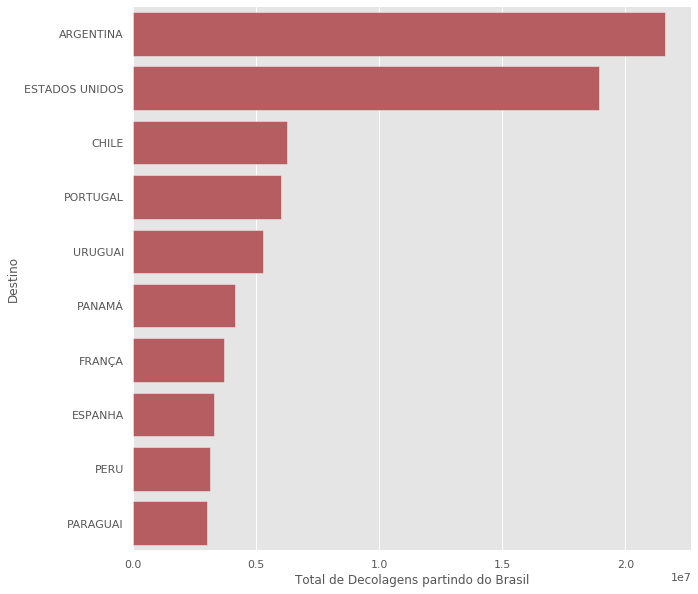

In [58]:
outbound_flights_by_country = outbound_flights.groupby('destino_pais')

top10 = outbound_flights_by_country['decolagens'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='destino_pais', x='decolagens', data=top10, label="DECOLAGENS", orient='h', color='r')
ax.set(ylabel="Destino", xlabel="Total de Decolagens partindo do Brasil")
sns.despine(left=True, bottom=True)

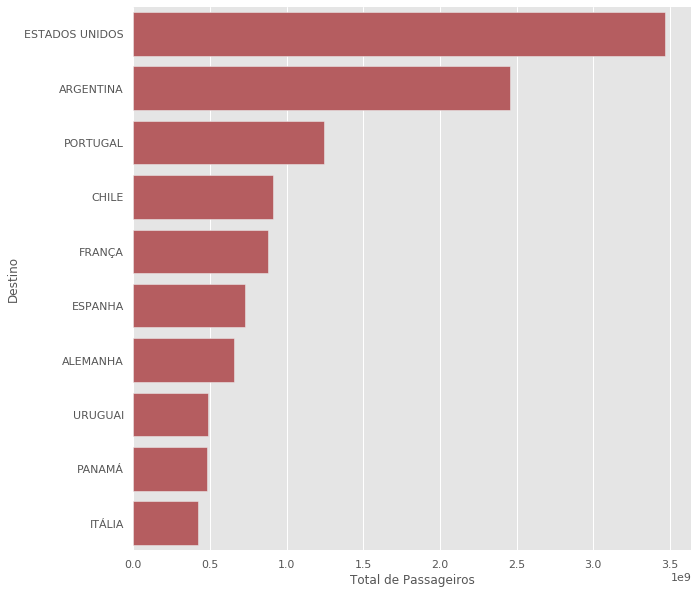

In [59]:
top10 = outbound_flights_by_country['passageiros_total'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='destino_pais', x='passageiros_total', data=top10, label="DECOLAGENS", orient='h', color='r')
ax.set(ylabel="Destino", xlabel="Total de Passageiros")
sns.despine(left=True, bottom=True)

É possível ter uma idéia do comportamento das chegadas e saídas de cada mês plotando um gráfico em linha do número de passageiros totais nos vôos de chegada e dos vôos de saída. É possível detectar picos nos meses de Janeiro, Julho, Agosto e Dezembro. 

Esses meses coincidem com o período tradicional de férias ou de alta temporada.

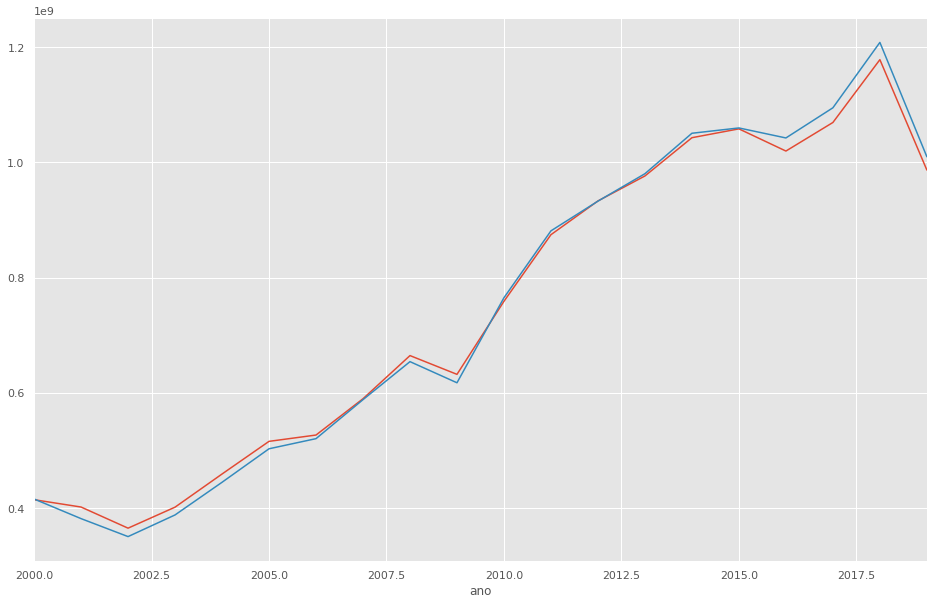

In [60]:
inbound_flights.groupby('ano')['passageiros_total'].sum().plot(figsize=(16,10),)
outbound_flights.groupby('ano')['passageiros_total'].sum().plot(figsize=(16,10),)
plt.show()

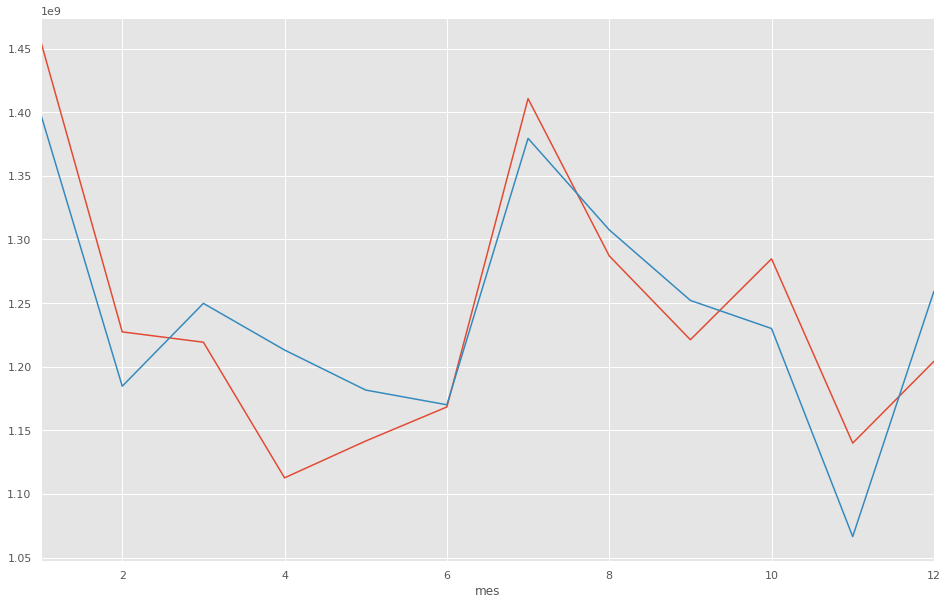

In [61]:
inbound_flights.groupby('mes')['passageiros_total'].sum().plot(figsize=(16,10),)
outbound_flights.groupby('mes')['passageiros_total'].sum().plot(figsize=(16,10),)
plt.show()

Finalmente, para acessar os dados relativos aos vôos domésticos, criaremos a variável *local_flights* que conterá apenas os registros onde o aeroporto de origem e destino é o Brasil e que contenham passageiros. A seguir agruparemos esses dados por combinação de aeroportos, como fizemos anteriormente. Serão plotados os gráficos de Decolagens em cada trecho, e os gráficos de passageiros totais e assentos vagos.

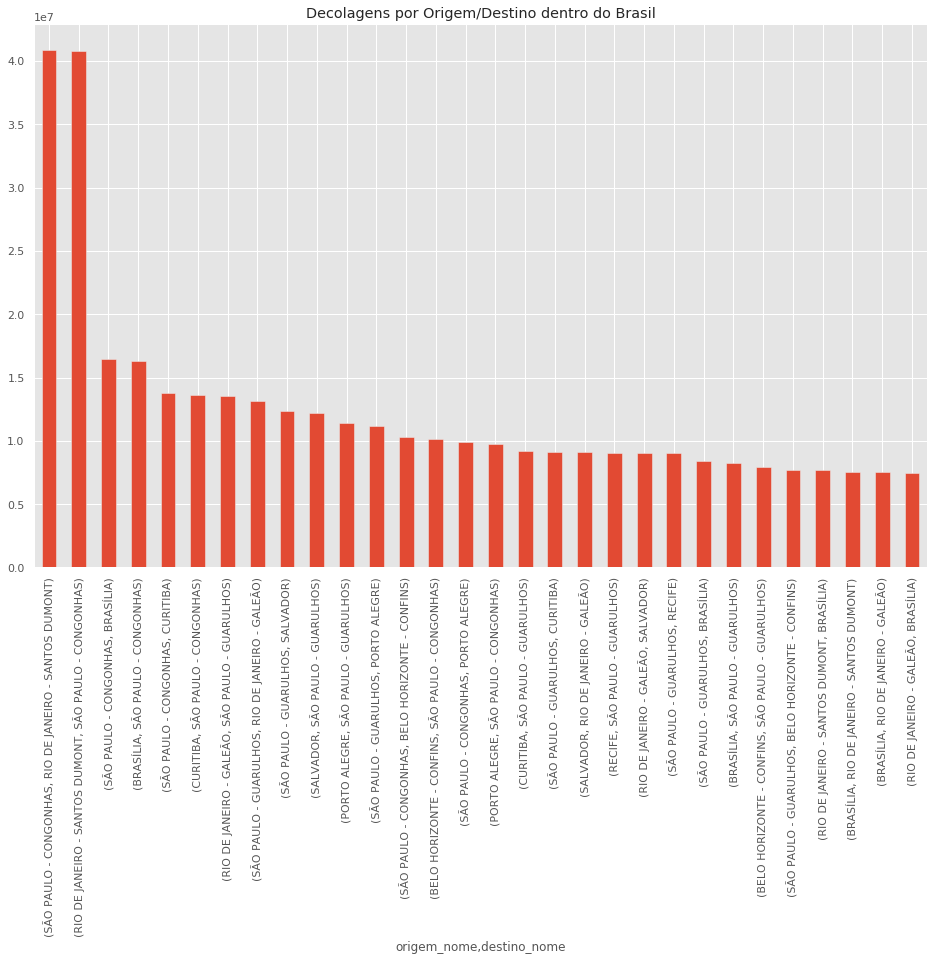

In [62]:
local_flights = flight_data[ (flight_data['origem_pais'] == "BRASIL") &
                                (flight_data['passageiros_total'] > 0) &
                                (flight_data['destino_pais'] == "BRASIL")]

local_flights_by_airport = local_flights.groupby(['origem_nome', 'destino_nome'])

top30 = local_flights_by_airport['decolagens'].sum().sort_values(ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino dentro do Brasil')

plt.show()

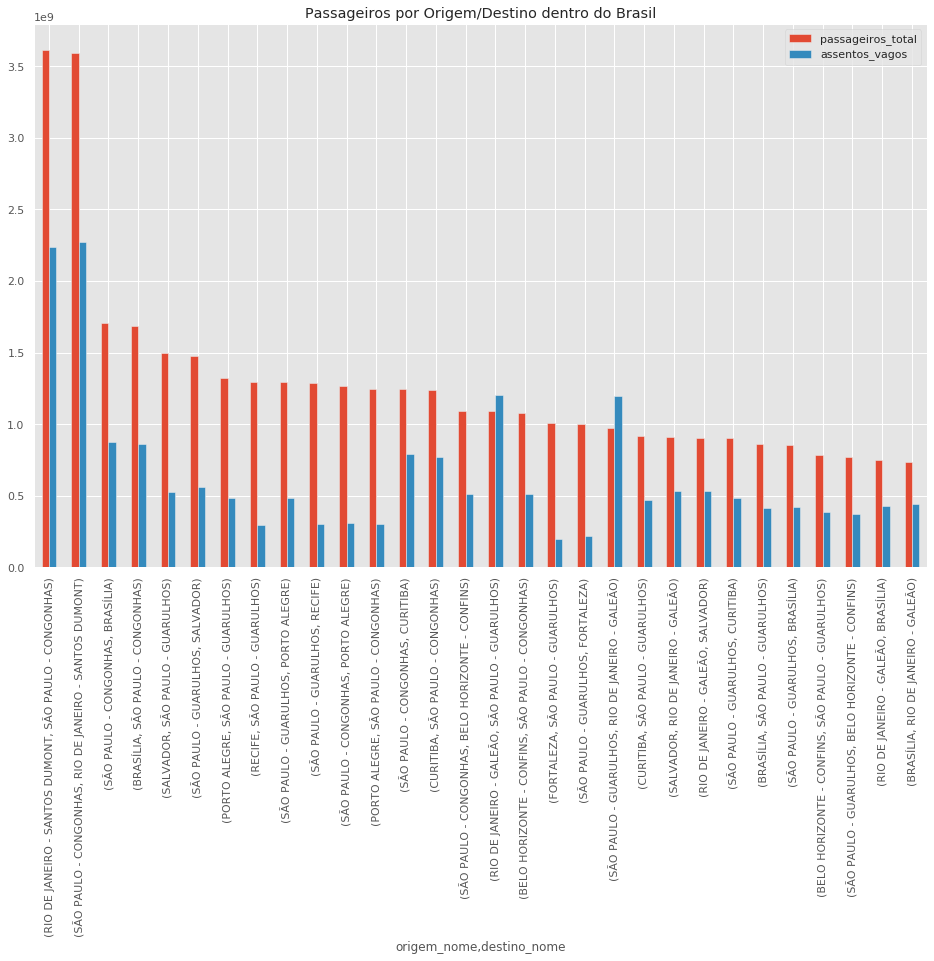

In [63]:
top30 = local_flights_by_airport['passageiros_total', 'assentos_vagos'].sum().sort_values('passageiros_total', ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino dentro do Brasil')

plt.show()

Podemos ver o número de aterrisagens por aeroporto, agrupando por Aeroporto de Destino, bem como o número de passageiros transportados dessa mesma maneira. A seguir serão plotados esses dois gráficos, com os 10 destinos mais frequentes e movimentados.

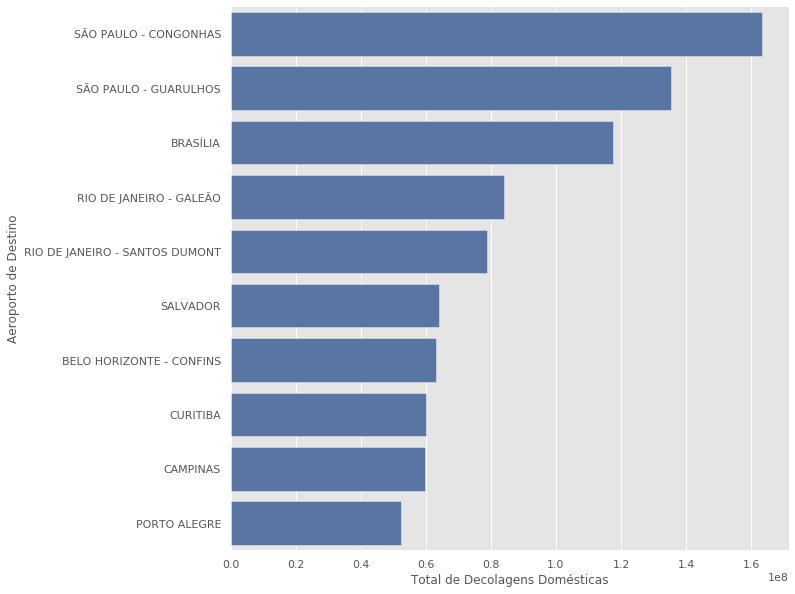

In [64]:
local_flights_by_airport = local_flights.groupby(['destino_nome'])

top10 = local_flights_by_airport['decolagens'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='destino_nome', x='decolagens', data=top10, label="DECOLAGENS", orient='h', color='b')
ax.set(ylabel="Aeroporto de Destino", xlabel=u"Total de Decolagens Domésticas")
sns.despine(left=True, bottom=True)

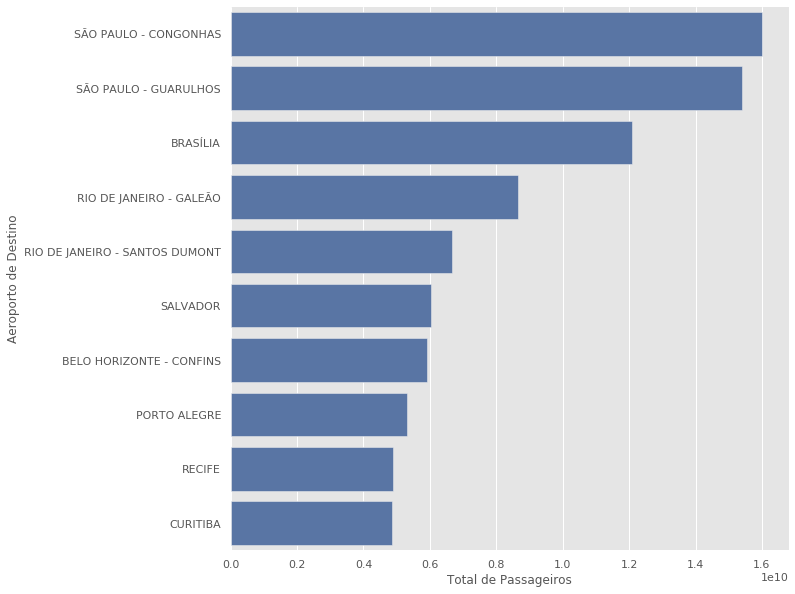

In [65]:
local_flights_by_airport = local_flights.groupby(['destino_nome'])

top10 = local_flights_by_airport['passageiros_total'].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='destino_nome', x='passageiros_total', data=top10, label="DECOLAGENS", orient='h', color='b')
ax.set(ylabel="Aeroporto de Destino", xlabel=u"Total de Passageiros")
sns.despine(left=True, bottom=True)

A última coisa que faremos hoje é calcular o total de passageiros transportados por empresa aérea. Esse gráfico pode ser obtido de maneira simples, bastando-se agrupar os dados pelo nome da Empresa. Plotaremos o total de passageiros transportados, e fica fácil observar que o mercado brasileiro é dominado por três grandes empresas (GOL, TAM e AZUL).

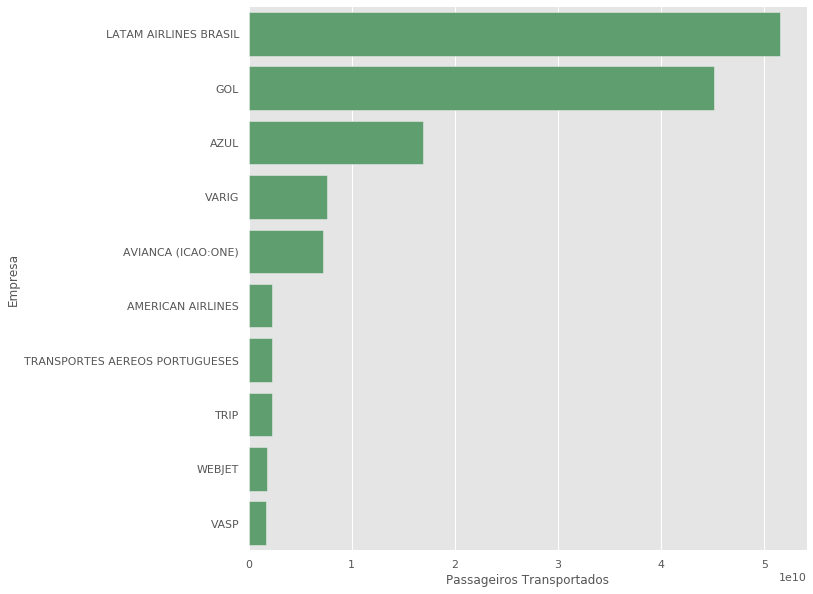

In [66]:
flights_by_company = flight_data.groupby('empresa_nome')

top10 = flights_by_company['passageiros_total'].sum().sort_values(ascending=False).reset_index()[:10]

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y='empresa_nome', x='passageiros_total', data=top10, orient='h', color='g')
ax.set(ylabel="Empresa", xlabel=u"Passageiros Transportados")
sns.despine(left=True, bottom=True)

Espero que tenham gostado da leitura. Os dados estão disponíveis no Portal da ANAC. 